In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import keras as k
import matplotlib.pyplot as plt

In [2]:
file_name = 'taxi_formated.xlsx'

In [3]:
def testing_data():
    data = pd.read_excel(file_name)
    test_data = data.sample(frac = 0.3).reset_index(drop = True) # 30% исходных данных для подготовки тестового набора
    data = pd.concat([data, test_data], ignore_index=True).drop_duplicates(keep = False).reset_index(drop = True) # оставшиеся данные идут для подготовки данных для обучения
    return(data, test_data)

In [4]:
#запись наборов данных в отдельные файлы
#learn_data, test_data = testing_data()
#learn_data.to_excel('learn_data.xlsx')
#test_data.to_excel('test_data.xlsx')

In [5]:
data_for_learning = 'learn_data.xlsx' #подготовленный файл learn_data.xlsx через prepairing_data.py
data_for_testing = 'test_data.xlsx'   #подготовленный файл test_data.xlsx через prepairing_data.py

In [6]:
learn_data = pd.read_excel(data_for_learning) #обучающий датафрейм
test_data = pd.read_excel(data_for_testing) #тестовый датафрейм

In [7]:
data_frame = learn_data
data_frame_test = test_data
print(data_frame)

       Unnamed: 0  offer_gk  weekday_key  hour_key  driver_gk  order_gk  \
0               0    759733            5        14       6080    358774   
1               1    416977            6        14       6080    866260   
2               2    889660            2         6       6080    163522   
3               3   1120055            4        16       6080    506710   
4               4   1058203            6        15       6080    360328   
...           ...       ...          ...       ...        ...       ...   
69995       69995   1021230            1         1       2442    351741   
69996       69996    658641            5        21       2442     90022   
69997       69997    726210            0         2       2442     27360   
69998       69998    672584            6        21       2442    140623   
69999       69999    542637            0        23       2442    140050   

       driver_latitude  driver_longitude  origin_order_latitude  \
0            55.805342         3

In [8]:
duration_rms = np.sqrt((np.sum(np.array(data_frame[['duration_min']][(data_frame['duration_min'] > 0)])) / len(np.array(data_frame[['duration_min']][(data_frame['duration_min'] > 0)]))) ** 2 )
print(duration_rms)

31.66095531300284


In [9]:
data_frame1 = data_frame[['weekday_key', 'hour_key', 'duration_min']][(data_frame['duration_min'] > 0) & (data_frame['duration_min'] < duration_rms * 4)]

row1 = np.array(data_frame1['hour_key'], dtype = float)
row2 = np.array(data_frame1['duration_min'], dtype = float)
row3 = data_frame1.sort_values(['hour_key'])
row3 = row3['hour_key'].unique()
row4 = []

for i in range (len(row3)):
    sqnum = np.sqrt(np.sum(data_frame1['duration_min'][(data_frame1['hour_key'] == i)]) / len(row3))
    row4.append(sqnum)
    
row4 = np.array(row4, dtype = float) #список среднеквадратичных значений проделжительности поездки от времени суток

In [10]:
data_frame2 = data_frame[['weekday_key', 'hour_key', 'duration_min']][(data_frame['duration_min'] > 0)]
duration_sigma_sqr = data_frame2[['duration_min']][(data_frame2['duration_min'] > 0)]
duration_sigma_sqr = np.sqrt(((duration_sigma_sqr['duration_min'] - duration_rms) ** 2) / (len(duration_sigma_sqr) - 1))
row_duration_sigma_sqr = np.array(duration_sigma_sqr, dtype = float)

In [11]:
row5 = data_frame2.sort_values(['hour_key'])
row5 = np.array(data_frame2['hour_key'], dtype = float)
row5 = data_frame2.sort_values(['hour_key'])
row5 = row5['hour_key'].unique()
row6 = []

for i in range (len(row5)):
    sqnum = np.sqrt(np.sum(row_duration_sigma_sqr) / len(row5))
    row6.append(sqnum)

row6 = np.array(row4, dtype = float) #список статистической дисперсии продолжительности поездки от времени суток

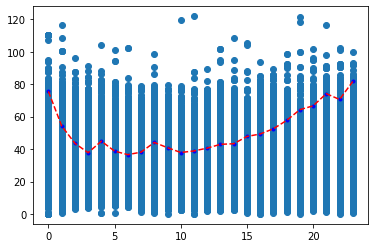

In [12]:
plt.plot (row5, row6 , '.', color = 'blue')
plt.scatter(row1, row2)
plt.plot (row3, row4 , '--', color = 'red')
plt.show()

In [512]:
input_data = np.array(data_frame['duration_min'][(data_frame['duration_min'] > 0) & (data_frame['duration_min'] > duration_rms / 3) & (data_frame['duration_min'] < duration_rms * 3)])
output_data = np.array(data_frame['hour_key'][(data_frame['duration_min'] > 0) & (data_frame['duration_min'] > duration_rms / 3) & (data_frame['duration_min'] < duration_rms * 3)])

In [513]:
print(input_data)
print(output_data)
print(len(input_data))
print(len(output_data))

[25.217 19.25  15.433 ... 29.817 51.1   56.183]
[14 16 20 ...  2 21 23]
45760
45760


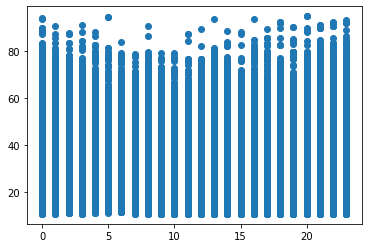

In [514]:
plt.scatter(output_data, input_data)
plt.show()

In [789]:
model = k.Sequential()
model.add(k.layers.Dense(units = 900, activation = 'tanh'))
model.add(k.layers.Dense(units = 10, activation = 'relu'))
model.add(k.layers.Dense(units = 10, activation = 'sigmoid'))
model.add(k.layers.Dense(units = 1, activation = 'relu'))

In [790]:
model.compile(loss = 'mse', optimizer = 'sgd', metrics=['accuracy'])
fit_results = model.fit(x = input_data, y = output_data, epochs = 10, validation_split = 0.2, verbose = 2)

Epoch 1/10
1144/1144 - 3s - loss: 55.8652 - accuracy: 0.0353 - val_loss: 62.1958 - val_accuracy: 0.0471
Epoch 2/10
1144/1144 - 2s - loss: 55.3741 - accuracy: 0.0353 - val_loss: 61.7264 - val_accuracy: 0.0471
Epoch 3/10
1144/1144 - 2s - loss: 55.3557 - accuracy: 0.0353 - val_loss: 61.8299 - val_accuracy: 0.0471
Epoch 4/10
1144/1144 - 2s - loss: 55.3542 - accuracy: 0.0353 - val_loss: 62.0869 - val_accuracy: 0.0471
Epoch 5/10
1144/1144 - 2s - loss: 55.3257 - accuracy: 0.0353 - val_loss: 61.8411 - val_accuracy: 0.0471
Epoch 6/10
1144/1144 - 2s - loss: 55.3124 - accuracy: 0.0353 - val_loss: 62.2477 - val_accuracy: 0.0471
Epoch 7/10
1144/1144 - 2s - loss: 55.3162 - accuracy: 0.0353 - val_loss: 62.5818 - val_accuracy: 0.0471
Epoch 8/10
1144/1144 - 2s - loss: 55.2442 - accuracy: 0.0353 - val_loss: 62.7372 - val_accuracy: 0.0471
Epoch 9/10
1144/1144 - 2s - loss: 55.3385 - accuracy: 0.0353 - val_loss: 61.6568 - val_accuracy: 0.0471
Epoch 10/10
1144/1144 - 2s - loss: 55.3141 - accuracy: 0.0353 - 

In [791]:
predicted_hour = np.array(data_frame_test['hour_key'])
predicted = model.predict(predicted_hour)

In [792]:
print(predicted)
print(predicted_hour)
print(len(predicted))
print(len(predicted_hour))
print(type(predicted))
print(type(predicted_hour))

[[12.80849  ]
 [12.192752 ]
 [12.8084545]
 ...
 [12.808387 ]
 [12.808518 ]
 [12.808511 ]]
[16  2 23 ... 14 19 17]
30000
30000
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


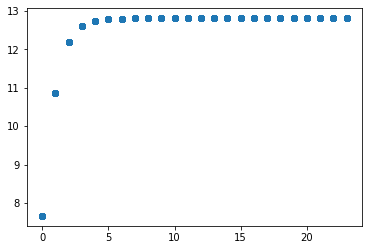

In [793]:
plt.scatter(predicted_hour, predicted)
plt.show()

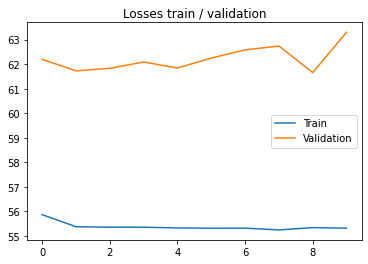

In [794]:
plt.title("Losses train / validation")
plt.plot(fit_results.history['loss'], label = 'Train')
plt.plot(fit_results.history['val_loss'], label = 'Validation')
plt.legend()
plt.show()

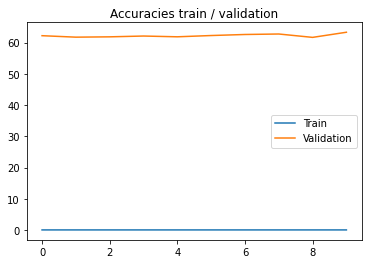

In [795]:
plt.title("Accuracies train / validation")
plt.plot(fit_results.history['accuracy'], label = 'Train')
plt.plot(fit_results.history['val_loss'], label = 'Validation')
plt.legend()
plt.show()